In [17]:
import gc
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from PIL import Image
from tqdm import tqdm
from tensorflow.keras import backend as K
warnings.filterwarnings(action='ignore')
K.image_data_format()

'channels_last'

In [3]:
# colab 네트워크 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
BASIC_PATH = '/content/drive/Shared drives/SGU/last_version'
DATA_PATH = os.path.join(BASIC_PATH, 'car_model')
SAVE_PATH = os.path.join(BASIC_PATH, 'save')
os.listdir(DATA_PATH)
os.listdir(SAVE_PATH)

['cnn_car_weights.h5', 'cnn_car_model.h5']

In [0]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train')
TEST_IMG_PATH = os.path.join(DATA_PATH, 'test')

In [0]:
# CSV 파일 경로
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_model.csv'))
df_test = pd.read_csv(os.path.join(DATA_PATH, 'test_model.csv'))
df_class = pd.read_csv(os.path.join(DATA_PATH, 'class_model.csv'))

In [21]:
df_class

,class,class_name
0,1,DumpTruck
1,2,Truck
2,3,Bus
3,4,Sedan
4,5,SUV
5,6,Trailer


In [0]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import  preprocess_input


In [0]:
# 모델을 읽는다.
img_width, img_height = 224, 224
# Parameter
img_size = (img_width, img_height)

model_path = os.path.join(SAVE_PATH, 'cnn_car_model.h5')

loaded_model = load_model(model_path)

In [37]:
# 전체 테스트 이미지의 결과를 보여준다. 

test_list = df_test['img_file'].tolist()
class_list = df_class['class_name'].tolist()
plt.figure(figsize=(20,40))
test_size = len(test_list)

test_images = [os.path.join(TEST_IMG_PATH, item) for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
result = loaded_model.predict(test_preprocessed_images, batch_size=1, verbose=1)

y_pred = np.argmax(result, axis=1)

for num, image_name in enumerate(test_list):
    test_img = plt.imread(os.path.join(TEST_IMG_PATH, image_name))
    test_img = cv2.resize(test_img,(img_width, img_height))
    test_img = np.reshape(test_img,[1,img_width, img_height,3])

    #result = loaded_model.predict(test_img, batch_size=1, verbose=1)
    #answer = np.argmax(result, axis=1)
    
    #target_class = loaded_model.predict_classes(test_img)

    test_img_open = Image.open(os.path.join(TEST_IMG_PATH, image_name))
    plt.subplot(test_size // 3 + 1, 3, num + 1)
    plt.title("{} -> {} ({}%)".format(image_name, class_list[int(y_pred[num])], np.round(result[num][y_pred[num]] * 100, 2)))
    plt.imshow(test_img_open)
    plt.axis('off')


Output hidden; open in https://colab.research.google.com to view.

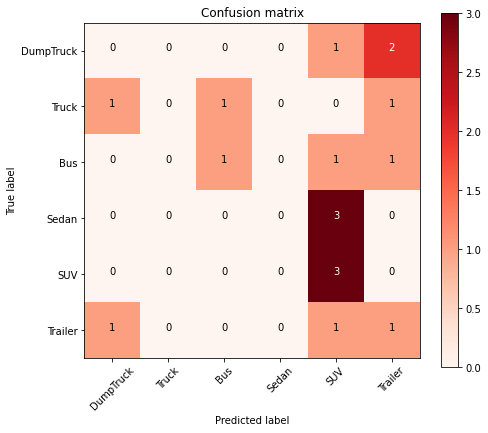

In [38]:
from sklearn.metrics import confusion_matrix

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a = preprocess_input(a)
    return a

classes = df_class['class_name'].tolist()
test_dfToList = df_test['img_file'].tolist()
test_ids = [str(item) for item in test_dfToList]

y_true = df_test['class'] - 1


conf_mat = confusion_matrix(y_true, y_pred)

import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
fig1.savefig(os.path.join(SAVE_PATH, 'Confusion_matrix.jpg'))
plt.show()
